1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('../data/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
variety=data.iloc[:,-1]
variety

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [4]:
variety.value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [5]:
sepal_length=data.iloc[:,0]
sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [6]:
sepal_width=data.iloc[:,1]
sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 150, dtype: float64

In [7]:
petal_length=data.iloc[:,2]
petal_length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

In [8]:
petal_width=data.iloc[:,3]
petal_width

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal.width, Length: 150, dtype: float64

In [9]:
#CREO MI X UNIENDO TODAS LAS COLUMNAS DEL DATAFRAME EXCEPTO LA DE TARGET EN UN ARRAY
X=np.array(list(zip(sepal_length,sepal_width,petal_length,petal_width)))
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
X.shape

(150, 4)

In [11]:
y=variety


In [12]:
from sklearn import preprocessing

In [13]:
#inicializo la libreria
le = preprocessing.LabelEncoder()

In [14]:
#LE PASO LA COLUMNA VARIETY PARA QUE LA CONVIERTA DE TEXTO A NUMERICA / VA A SER MI Y
variety_encoded = le.fit_transform(variety)
y=variety_encoded
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#PARTO EL CONJUNTO DE DATOS  80% para X_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [16]:
#inicializamos en modelo para un K=3 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

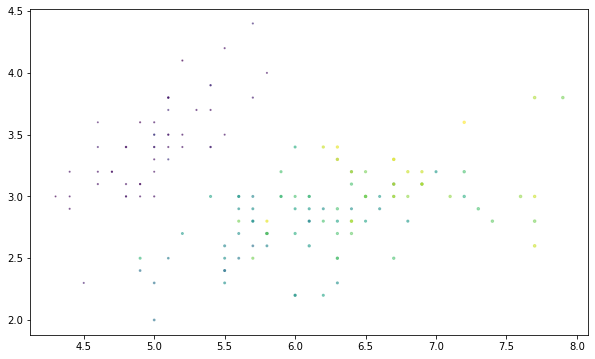

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(sepal_length,sepal_width,petal_length,petal_width, alpha=0.5)

In [18]:
#predice que variedad es la planta con esa variable
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[2]


In [19]:
#predice que variedad es la planta con esa variable
predicted = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

[2]


In [20]:
# ME INFORMA DE LOS TRES VECINO QUE TOMA Y LAS POSICIONES QUE OCUPAN EN EL ARRAY DE X
model.kneighbors([(15.7,2.8,9.5,0.1)], return_distance=True) 

(array([[8.66371745, 8.68619595, 8.69712596]]),
 array([[47, 40, 62]], dtype=int32))

In [21]:
model.kneighbors([(1.7,3.8,4.5,11.3)], return_distance=True) 

(array([[ 9.86813052, 10.05484958, 10.11039069]]),
 array([[11, 55, 91]], dtype=int32))

In [22]:
#LE DIGO QUE ME DE LAS PREVISIONES DE Y CON EL CONJUNTO DE TEST
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 0])

In [23]:

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [24]:
#AHORA CON K=7

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 0])

In [27]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [28]:
#CONJUNTO DE TEST  60% de datos

In [29]:
#PARA K3 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 1])

In [32]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [33]:
#PARA K7 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2,
       2, 1])

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


([<matplotlib.axis.XTick at 0x13956850>,
 <a list of 21 Text major ticklabel objects>)

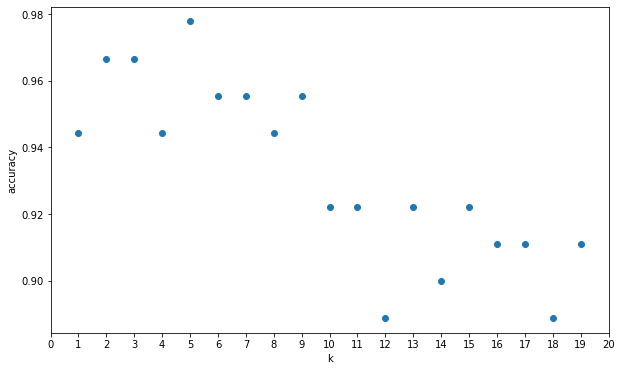

In [37]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [38]:
#QUITAMOS SETOSA

In [39]:
variety2=variety.iloc[50::]
variety2

50     Versicolor
51     Versicolor
52     Versicolor
53     Versicolor
54     Versicolor
          ...    
145     Virginica
146     Virginica
147     Virginica
148     Virginica
149     Virginica
Name: variety, Length: 100, dtype: object

In [40]:
variety_encoded = le.fit_transform(variety2)
y=variety_encoded
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
y.shape

(100,)

In [42]:
sepal_length_2=sepal_length.iloc[50::]
sepal_length_2

50     7.0
51     6.4
52     6.9
53     5.5
54     6.5
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 100, dtype: float64

In [43]:
sepal_width_2=sepal_width.iloc[50::]
sepal_width_2

50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 100, dtype: float64

In [44]:
petal_length_2=petal_length.iloc[50::]
petal_length_2

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 100, dtype: float64

In [45]:
petal_width_2=petal_width.iloc[50::]
petal_width_2

50     1.4
51     1.5
52     1.5
53     1.3
54     1.5
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal.width, Length: 100, dtype: float64

In [46]:
x=np.array(list(zip(sepal_length_2,sepal_width_2,petal_length_2,petal_width_2)))
x.shape

(100, 4)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(60, 4)
(90, 4)


In [48]:
#inicializamos en modelo para un K=3 vecinos y lo entrenamos con los valores del conjunto de entrenamiento
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [49]:
predicted = model.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted)

[1]


In [50]:
predicted = model.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted)

[1]


In [51]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [52]:
#baja mucho el porcentaje de acierto
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [55]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95
